## Indice:
* [Data-set description](#1)
* * [Data Manipulation in R](#2)
* * [Data Manipulation in Python](#3)
* [Introduction to the Linear Regression Model](#4)
* * [Usefulness of the Linear Regression Model](#5)
* * [Formal Approach to the Linear Regression Modelo](#6)
* *[Basic Assumptions](#7)
* *[Assumptions Consequences](#8)
* *[Matrix representation of the basic assumption of the model](#9)
* [Estimation](#10)
* * [Prediction of Response Variable](#11)
* * [Estimation of model coefficients](#12)
* * [Estimation of model errors](#13)
* * [Regression Hyperplane ](#14)
* * [Hat-Matrix](#15)
* * [Right Join](#16)
* * [Semi Join](#17)
* * [Anti Join](#18)
* * [Union](#19)
* * [Intersect](#20)
* * [Difference](#21)
*  [Concatenate](#22)
*  [Group and Summarize](#23)
*  [Other usuful functions ](#24)

## Data-set description <a class="anchor" id="1"></a>



We are going to describe the data-set we will use in this article.

The data are 1905 observation about 38 variables on housing features.

Here is the link where the data was loaded:
<https://www.kaggle.com/datasets/dataregress/dubai-properties-dataset?resource=download>



The variables of our interest are the following:

-   id : identificator

-   neighborhood: the name of the neighborhood

-   latitude: the latitude of the house

-   longitude: the longitude of the house

-   price: the market price of the house

-   size_in_sqft: the size of the house in square foot

    -   1 sqft = 0.092903 $m^2$

-   price_per_sqft: the market price of the house per square foot

-   no_of_bedrooms: number of bedrooms in the house

-   no_of_bathrooms: number of bathrooms in the house

-   quality: quality of the house. Based on the number of services. Her
    categories are Ultra, High, Medium and Low

-   maid_room: indicates if the house has maid room (cuarto de servicio)
    (true/false)

-   unfurnished: indicates if the house is unfurnished (sin amueblar)
    (true/false)

-   balcony: indicates if the house has balcony (true/false)

-   barbecue_area: indicates if the house has barbecue area (true/false)

-   central_ac: indicates if the house has central air conditioning
    (true/false)

-   childrens_play_area: indicatees if the house has childrens game area
    (true/false)

-   childrens_pool: indicates if the house has childrens pool
    (true/false)

-   concierge: indicates if the house has concierge (true/false)

-   covered_parking: indicates if the house has covered parking
    (true/false)

-   kitchen_appliances: indicates if the house has kitchen appliances
    (electrodomesticos de cocina) (true/false)

-   maid_service: indicates if the house has maid service (servicio de
    limpieza) (true/false)

-   pets_allowed: indicates if pets are allowed(true/false)

-   private_garden: indicates if the house has private garden
    (true/false)

-   private_gym: indicates if the house has private gym (true/false)

-   private_jacuzzi: indicates if the house has private jacuzzi
    (true/false)

-   private_pool: indicates if the house has private pool (true/false)

-   security: indicates if the house has private secutity (true/false)

-   shared_gym: indicates if the house has shared gym (true/false)

-   shared_pool: indicates if the house has shared pool (true/false)

-   shared_spa: indicates if the house has shared spa (true/false)

-   view_of_water: indicates if the house has view of the water
    (true/false)





Now we are going to do the following:

1. We are going to load an manipulate the data-set in R

2. We will repeat this task in Python



### Data Manipulation in R <a class="anchor" id="2"></a>

In [3]:
import rpy2

%load_ext rpy2.ipython

import rpy2.robjects as robjects

Unable to determine R home: [WinError 2] El sistema no puede encontrar el archivo especificado
c:\Users\Usuario\AppData\Local\R-MINI~1\lib\site-packages\rpy2\robjects\packages.py:367: UserWarning: The symbol 'quartz' is not in this R namespace/package.
  warnings.warn(


In [4]:
%%R

library(tidyverse)

R[write to console]: -- Attaching packages --------------------------------------- tidyverse 1.3.1 --

R[write to console]: v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

R[write to console]: -- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()




We load the data-set with which we are going to work:


In [5]:
%%R 

url = 'https://raw.githubusercontent.com/FabioScielzoOrtiz/Estadistica4all-blog/main/Linear%20Regression%20in%20Python%20and%20R/properties_data.csv'

properties_data <- read_csv(url)

Rows: 1905 Columns: 38
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (2): neighborhood, quality
dbl  (8): id, latitude, longitude, price, size_in_sqft, price_per_sqft, no_o...
lgl (28): maid_room, unfurnished, balcony, barbecue_area, built_in_wardrobes...

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


Now, we are going to tranformate the variables that are measured in square foot (sqft) to square meters $(m^2)$



size_in_m\_2 = 0.092903 \* size_in_sqft

price_per_m\_2 = price_per_sqft / 0.092903





Now, we are going to tranformate the variables that are measured in square foot (sqft) to square meters $(m^2)$

size_in_m\_2 = 0.092903 \* size_in_sqft

price_per_m\_2 = price_per_sqft / 0.092903



In [6]:
%%R 

size_in_m_2 <-  0.092903*properties_data$size_in_sqft

properties_data$size_in_m_2 <- size_in_m_2

price_per_m_2 <- properties_data$price_per_sqft /  0.092903 

properties_data$price_per_m_2 <- price_per_m_2




The following step will be remove in the data-set the variables that we will not take into account:


In [7]:
%%R 

 properties_data$quality = recode(properties_data$quality , "Low"=0, "Medium"=1, "High"=2 , "Ultra"=3)

properties_data$quality = factor(properties_data$quality)

In [8]:
%%R 

data_R <- properties_data %>% select("price", "size_in_m_2", "longitude", "latitude", "no_of_bedrooms", "no_of_bathrooms", "quality")

head(data_R)

# A tibble: 6 x 7
    price size_in_m_2 longitude latitude no_of_bedrooms no_of_bathrooms quality
    <dbl>       <dbl>     <dbl>    <dbl>          <dbl>           <dbl> <fct>  
1 2700000       100.       55.1     25.1              1               2 1      
2 2850000       147.       55.2     25.1              2               2 1      
3 1150000       181.       55.1     25.1              3               5 1      
4 2850000       188.       55.3     25.2              2               3 0      
5 1729200        47.1      55.1     25.1              0               1 1      
6 3119900        94.3      55.1     25.1              1               2 1      


### Data Manipulation in Python <a class="anchor" id="3"></a>

In [9]:
import pandas as pd

from dfply import *

import warnings
warnings.filterwarnings('ignore')

In [10]:
url = 'https://raw.githubusercontent.com/FabioScielzoOrtiz/Estadistica4all-blog/main/Linear%20Regression%20in%20Python%20and%20R/properties_data.csv'

data_Python = pd.read_csv(url)

data_Python

,id,neighborhood,latitude,longitude,price,size_in_sqft,price_per_sqft,no_of_bedrooms,no_of_bathrooms,quality,...,private_pool,security,shared_gym,shared_pool,shared_spa,study,vastu_compliant,view_of_landmark,view_of_water,walk_in_closet
0,5528049,Palm Jumeirah,25.113208,55.138932,2700000,1079,2502.32,1,2,Medium,...,False,False,True,False,False,False,False,False,True,False
1,6008529,Palm Jumeirah,25.106809,55.151201,2850000,1582,1801.52,2,2,Medium,...,False,False,True,True,False,False,False,False,True,False
2,6034542,Jumeirah Lake Towers,25.063302,55.137728,1150000,1951,589.44,3,5,Medium,...,False,True,True,True,False,False,False,True,True,True
3,6326063,Culture Village,25.227295,55.341761,2850000,2020,1410.89,2,3,Low,...,False,False,False,False,False,False,False,False,False,False
4,6356778,Palm Jumeirah,25.114275,55.139764,1729200,507,3410.65,0,1,Medium,...,False,True,True,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1900,7705450,Mohammed Bin Rashid City,25.176892,55.310712,1500000,1087,1379.94,2,2,Ultra,...,False,True,True,True,True,True,True,True,True,True
1901,7706287,Mohammed Bin Rashid City,25.166145,55.276684,1230000,760,1618.42,1,2,Medium,...,False,False,True,True,False,False,False,False,True,True
1902,7706389,Dubai Creek Harbour (The Lagoons),25.206500,55.345056,2900000,1930,1502.59,3,5,Medium,...,False,False,False,True,False,False,False,False,False,False
1903,7706591,Jumeirah Village Circle,25.073858,55.229844,675000,740,912.16,1,2,Medium,...,False,True,True,True,False,False,False,False,True,True


In [11]:
data_Python['size_in_m_2'] = 0.092903*data_Python['size_in_sqft']
data_Python['price_per_m_2'] = data_Python['price_per_sqft']/0.092903

In [12]:
data_Python = data_Python >> select(X.price , X.size_in_m_2, X.longitude, X.latitude, X.no_of_bedrooms, X.no_of_bathrooms, X.quality)
data_Python

,price,size_in_m_2,longitude,latitude,no_of_bedrooms,no_of_bathrooms,quality
0,2700000,100.242337,55.138932,25.113208,1,2,Medium
1,2850000,146.972546,55.151201,25.106809,2,2,Medium
2,1150000,181.253753,55.137728,25.063302,3,5,Medium
3,2850000,187.664060,55.341761,25.227295,2,3,Low
4,1729200,47.101821,55.139764,25.114275,0,1,Medium
...,...,...,...,...,...,...,...
1900,1500000,100.985561,55.310712,25.176892,2,2,Ultra
1901,1230000,70.606280,55.276684,25.166145,1,2,Medium
1902,2900000,179.302790,55.345056,25.206500,3,5,Medium
1903,675000,68.748220,55.229844,25.073858,1,2,Medium


In [13]:
data_Python.dtypes

price                int64
size_in_m_2        float64
longitude          float64
latitude           float64
no_of_bedrooms       int64
no_of_bathrooms      int64
quality             object
dtype: object

In [14]:
data_Python['quality'] = data_Python['quality'].astype('category')

In [15]:
data_Python.dtypes

price                 int64
size_in_m_2         float64
longitude           float64
latitude            float64
no_of_bedrooms        int64
no_of_bathrooms       int64
quality            category
dtype: object

In [16]:
data_Python['quality'].unique()

['Medium', 'Low', 'High', 'Ultra']
Categories (4, object): ['High', 'Low', 'Medium', 'Ultra']

In [17]:
(data_Python['quality_recode']) = 0

for i in range(0 , len(data_Python)) :

    if (data_Python['quality'])[i] == 'Low' :

        (data_Python['quality_recode'])[i] = 0

    if (data_Python['quality'])[i] == 'Medium' :

        (data_Python['quality_recode'])[i] = 1

    if (data_Python['quality'])[i] == 'High' :

        (data_Python['quality_recode'])[i] = 2

    if (data_Python['quality'])[i] == 'Ultra' :

        (data_Python['quality_recode'])[i] = 3

In [18]:
data_Python.head()

,price,size_in_m_2,longitude,latitude,no_of_bedrooms,no_of_bathrooms,quality,quality_recode
0,2700000,100.242337,55.138932,25.113208,1,2,Medium,1
1,2850000,146.972546,55.151201,25.106809,2,2,Medium,1
2,1150000,181.253753,55.137728,25.063302,3,5,Medium,1
3,2850000,187.664060,55.341761,25.227295,2,3,Low,0
4,1729200,47.101821,55.139764,25.114275,0,1,Medium,1


In [19]:
data_Python = data_Python >> select( ~X.quality )

In [20]:
data_Python = data_Python >> rename(quality = X.quality_recode)

In [21]:
data_Python['quality'] = data_Python['quality'].astype('category')

The final python data-set would be:

In [22]:
data_Python

,price,size_in_m_2,longitude,latitude,no_of_bedrooms,no_of_bathrooms,quality
0,2700000,100.242337,55.138932,25.113208,1,2,1
1,2850000,146.972546,55.151201,25.106809,2,2,1
2,1150000,181.253753,55.137728,25.063302,3,5,1
3,2850000,187.664060,55.341761,25.227295,2,3,0
4,1729200,47.101821,55.139764,25.114275,0,1,1
...,...,...,...,...,...,...,...
1900,1500000,100.985561,55.310712,25.176892,2,2,3
1901,1230000,70.606280,55.276684,25.166145,1,2,1
1902,2900000,179.302790,55.345056,25.206500,3,5,1
1903,675000,68.748220,55.229844,25.073858,1,2,1


**Important**: to use categorical variables in a linear regression model in Python they must be recoded (their values must be numbers that represents their categories), i.e, we cannot use the variable *quality* , insteaf of it we can use *quality_recode*

This is the reason we have recoded *quality* in Python but not in R, because in R is not strictly necessary.

Note we have obtained the same data-set that was obtained with R.

- The R data-set has been called *data_R*

- The Python data-set has been called *data_python*


We will use both of them throughout this article. 

## Introduction to the Linear Regression Model <a class="anchor" id="4"></a>


The principal propose of this article is carry out a theoretical and
also practical exposition of the linear regression model.

Without any doubt the this is the most know statistical model.

There is the idea that the linear regression model is outdated compared
with other modern statistical models. But I would like to defend his
validity nowadays, first of all as a statistical tool, and second as a
previous necessary step to learn other most modern and complex methods.

The linear regression model is the base of many modern regression
techniques, so that is highly recommended study it enough, before to go deeper in other statistical models.

The most important references on which this article is based are "Linear Models with
R" by Julian Faraway (second edition), and "An introduction to
statisticcal learning" by Gareth James (second edition), the blog [cienciadedatos.net](https://www.cienciadedatos.net/index.html) by Joaquin Amat Rodrigo, and the web page [realpython](https://realpython.com/)





### Usefulness of the Linear Regression Model <a class="anchor" id="5"></a>



The main usefulness of the linear regression model is to predict the
values of a **quantitative** variable  depending on the values of other variables (**quantitative or categorical**),
called predictors.

There are other usefulness of the model besides the commented. We will
see them later.





### Formal Approach to the Linear Regression Modelo <a class="anchor" id="6"></a>

We have the following elements:

-   Response Variable:  a **quantitative** variable
      $Y=(y_{1} , y_2,...,y_n)^t$

-   Predictors: a set of **quantitative** or **categorical**
    variables:


\begin{gather*}
X_1 = (x_{11}, x_{21}, ..., x_{n1})^t \\
X_2 = (x_{12}, x_{22}, ..., x_{n2})^t \\
... \\
X_p = (x_{1p}, x_{2p}, ..., x_{np})^t
\end{gather*}


-   Predictors Matrix:

    
    \begin{gather*}
    X=(1, X_1, X_2,...,X_p) = 
    \begin{pmatrix}
    1 & x_{11}&x_{12}&...&x_{1p}\\
    1 & x_{21}&x_{22}&...&x_{2p}\\
    &...&\\
    1& x_{n1}&x_{n2}&...&x_{np}
    \end{pmatrix} = 
    \begin{pmatrix}
    x_{1}\\
    x_{2}\\
    ...\\
    x_{n}
    \end{pmatrix}
    \end{gather*}
    

-   Coefficients vector:


\begin{gather*}
\beta=(\beta_{1}, \beta_{2}, ..., \beta_{n})^t 
\end{gather*}

-   Errors vector:


\begin{gather*}
\varepsilon=(\varepsilon_{1}, \varepsilon_{2}, ..., \varepsilon_{n})^t 
\end{gather*}




### Basic Assumptions <a class="anchor" id="7"></a>


The basic assumptions of the model are the following:

<br>

- $ y_i \hspace{0.1cm} =  \hspace{0.1cm} x_i^t \cdot \beta  +  \varepsilon_i \hspace{0.1cm} =  \hspace{0.1cm}   \beta_0 + \sum_{j=1}^{p} \left( \beta_j \cdot x_{ij} \right) + \varepsilon_i \hspace{0.1cm} =  \hspace{0.1cm}  \beta_0 + \beta_1 \cdot x_{i1} + \beta_2 \cdot x_{i2} + ... + \beta_p \cdot x_{ip} + \varepsilon_i $
 
 <br>
 
-  $\varepsilon_i$ is a random variable such that:


   - $E[\varepsilon_i]=0$ 
   - $Var(\varepsilon_i)=\sigma^2$
   - $\varepsilon_i \sim N(0,\sigma)$ 
   - $cov(\varepsilon_i , \varepsilon_j)=0$

<br>

- Additional assumptions:

  -  $n > p+1$ ( nº observations \> nº of coefficients to estimate )

  -  $Rg(X)=p+1$




### Assumptions Consequences <a class="anchor" id="8"></a>


   -  $y_i$ is a random variable because  $\varepsilon_i$ is a random variable

   -  $E[y_i]= x_i^t \cdot \beta$

   -  $Var(y_i) = \sigma^2$

   -  $y_i \sim N(x_i^t \cdot \beta , \sigma)$

   -  $cov(y_i , y_j)=0$




### Matrix representation of the basic assumption of the model <a class="anchor" id="9"></a>

<br>

- $ Y=X\cdot \beta + \varepsilon $

- $\varepsilon_i \sim N(0,\sigma) \hspace{0.4cm} \forall \hspace{0.1cm} i=1,...,n $
  
- $cov(\varepsilon_i , \varepsilon_j)=0 \hspace{0.4cm} \forall \hspace{0.1cm} i\neq j =1,...,n $



## Estimation  <a class="anchor" id="10"></a>



###  Prediction of Response Variable <a class="anchor" id="11"></a>


The linear regression model predict the response variable value $y_i$  for the combination of predictors values  $x_i = (x_{i1}, x_{i2}, ..., x_{ip})^t$  as:

\begin{gather*}
\hat{y}_i = x_i^t \cdot \hat{\beta}  = \hat{\beta}_0 + \sum_{j=1}^{p} \hat{\beta}_j \cdot x_{ij} = \hat{\beta}_0 + \hat{\beta}_1 \cdot x_{i1} + \hat{\beta}_2 \cdot x_{i2} + ... + \hat{\beta}_p \cdot x_{ip} 
\end{gather*}




### Estimation of model coefficients <a class="anchor" id="12"></a>


The estimation of $\beta$  in the classic linear regression model is done
using the ordinary least square (OLS) method.

$\hat{\beta}$  is compute as the solution of the following optimitation
problem:

\begin{gather*}
Min  \sum_{i=1}^{n} (y_i - \widehat{y}_i)^2 = \sum_{i=1}^{n} (y_i - x_i^t \cdot \beta)^2 
\end{gather*}

<br>

The problem solution is:

\begin{gather*}
\hat{\beta}=(X^t \cdot X)^{-1} \cdot X^t \cdot Y
\end{gather*}

<br>

**Observation:**

We will not view here the mathematical details about the resolution of
this optimization problem. But is a classic convex optimization problem,
so it´s enough to take first derivatives of the objetive function with
respect to the coefficients  $\beta_0,\beta_1,...,\beta_p$ ,  set them equal to zero (0), and solve the resultant equation system with respect
to  $\beta$



### Estimation of model errors <a class="anchor" id="13"></a>


The model errors  $\varepsilon_i$  are estimated as:

$$
\hat{\varepsilon}_i \hspace{0.1 cm} = \hspace{0.1 cm} y_i - \hat{y}_i \hspace{0.1 cm} = \hspace{0.1 cm} y_i - x_i^t \cdot \hat{\beta}  
$$

for $\hspace{0.1cm}$ $i=1,...,n$


**Observation:**

$\hat{\varepsilon}_i$  is the error done by the model when it
estimates/predicts  $y_i$  as  $\hat{y}_i=x_i^t \cdot \hat{\beta}$




### Regression Hyperplane <a class="anchor" id="14"></a>

The regression hyperplane is the matrix expression of the predictions
that the model does of the response variable values:


\begin{gather*}
\hat{Y} = X \cdot \hat{\beta}  
\end{gather*}

Where:    $\hat{Y}=(\hat{y}_1,\hat{y}_2,...,\hat{y}_n)^t$




### Hat-Matrix <a class="anchor" id="15"></a>



\begin{gather*}
\hat{Y} = X \cdot \hat{\beta} = X \cdot (X^t \cdot X)^{-1} \cdot X^t \cdot Y = H \cdot Y  
\end{gather*}



Where:   $H= X \cdot (X^t \cdot X)^{-1} \cdot X^t$  is called Hat-Matrix


## Estimation of the Linear Regression Model in R




In this section we are going to show how estimate a linear regression
model in R, using for this purpose the data-set that was showed at the begining of the article.

The linear regression model that we propose is the following:

\begin{gather*}
price_i = \beta_0 +  \beta_1 \cdot size\_in\_m\_2_i + \beta_2 \cdot no\_of\_bedrooms_i +  \beta_3 \cdot no\_of\_bathrooms_i + \\ + \beta_4 \cdot quality_i + \beta_5\cdot  latitude_i +  \beta_6 \cdot longitude_i + \varepsilon_i
\end{gather*}



In [23]:
%%R

model_R_1 <- lm( price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + quality + latitude + longitude ,
data = data_R)

summary(model_R_1)


Call:
lm(formula = price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + 
    quality + latitude + longitude, data = data_R)

Residuals:
      Min        1Q    Median        3Q       Max 
-13398393   -562302     68143    562733  15384235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.207e+07  2.995e+07  -2.073   0.0383 *  
size_in_m_2      3.566e+04  7.238e+02  49.271  < 2e-16 ***
no_of_bedrooms  -8.367e+05  8.282e+04 -10.102  < 2e-16 ***
no_of_bathrooms -5.712e+04  6.829e+04  -0.836   0.4030    
quality1         1.400e+05  8.358e+04   1.675   0.0940 .  
quality2         3.406e+05  1.551e+05   2.196   0.0282 *  
quality3         2.788e+05  1.976e+05   1.410   0.1586    
latitude         6.115e+06  7.809e+05   7.830 8.03e-15 ***
longitude       -1.677e+06  6.908e+05  -2.428   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1605000 on 1896 degrees of freedom
Multiple R-squared:  0.6

## Estimation of Linear Regression Model in Python with `statsmodels`



We can implement a linear regression model in Python with the following code:

In [24]:
import statsmodels.formula.api as smf
import statsmodels.api as sm


In [25]:
model_Python_1 = smf.ols(formula = 'price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + quality + latitude + longitude', 
                 data =data_Python)

model_Python_1 = model_Python_1.fit()
 
print(model_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     547.4
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:43:50   Log-Likelihood:                -29918.
No. Observations:                1905   AIC:                         5.985e+04
Df Residuals:                    1896   BIC:                         5.990e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.207e+07   2.99e+07     

The previous output gives us the estimation of the model coefficients
(betas), both outputs give similar results (but we will consider the python output):

<br>

$
\hat{\beta}_0 =  -6.207e+07  \\
\hat{\beta}_{quality1} =1.4e+05\\
\hat{\beta}_{quality2} = 3.406e+05 \\ 
\hat{\beta}_{quality3} = 2.788e+05 \\
\hat{\beta}_{size\_in\_m\_2} =3.566e+04 \\
\hat{\beta}_{no\_of\_bedrooms} = -8.367e+05 \\
\hat{\beta}_{no\_of\_bathrooms} = -5.712e+04 \\
\hat{\beta}_{latitude}=6.115e+06 \\
\hat{\beta}_{longitude}= -1.677e+06 \\
$

<br>

So, the estimated model is:


\begin{gather*}
\widehat{price}_i =  -6.207e+07 +  3.566e+04 \cdot size\_in\_m\_2_i -8.367e+05 \cdot no\_of\_bedrooms_i -5.712e+04 \cdot no\_of\_bathrooms_i +\\ 1.4e+05 \cdot quality1_i + 3.406e+05\cdot quality2_i + 2.788e+05  \cdot quality3_i  +6.115e+06\cdot  latitude_i -1.677e+06   \cdot longitude_i 
\end{gather*}

<br>

**Observation:**

The  categorical variable, *quality*, that has 4 categories (Low (0), Medium (1),
High (2), Ultra (3)), enter in the model with 3 variables (quality1 ,
quality2, quality3 ). The category. that is out of the model is Low (0) because is the firs category. 

This isn´t a particularity of this variable, but rather it´s a property of the categorical variables in the regression models.

Later it will be seen how this affects model coefficients interpretation.  


## Estimation of Linear Regression Model in Python with `scikit-learn`


In [26]:
# pip install sklearn

import sklearn

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split



We can use a training data-set to train the model in Python with the  `scikit-learn` module. 

This concepts will be seen with much more detail in a specific article about validation techniques.



In [27]:
X = data_Python[['size_in_m_2', 'no_of_bedrooms', 'no_of_bathrooms' , 'quality' , 'latitude' , 'longitude' ]]
y = data_Python[['price']]

In [28]:
X_train, X_test, y_train, y_test = train_test_split( 
                                           X , 
                                           y.values.reshape(-1,1) ,
                                           train_size = 0.8,
                                           random_state = 1234, 
                                           shuffle = True )

In [29]:
X.head()

,size_in_m_2,no_of_bedrooms,no_of_bathrooms,quality,latitude,longitude
0,100.242337,1,2,1,25.113208,55.138932
1,146.972546,2,2,1,25.106809,55.151201
2,181.253753,3,5,1,25.063302,55.137728
3,187.664060,2,3,0,25.227295,55.341761
4,47.101821,0,1,1,25.114275,55.139764


In [30]:
y.head()

,price
0,2700000
1,2850000
2,1150000
3,2850000
4,1729200


In [31]:
X_train, X_test, y_train, y_test = train_test_split( 
                                           X , 
                                           y.values.reshape(-1,1) ,
                                           train_size = 0.8,
                                           random_state = 1234, 
                                           shuffle = True )


y.values.reshape(-1,1) to transformate y in a colum array


In [32]:
y.values.reshape(-1,1)

array([[2700000],
       [2850000],
       [1150000],
       ...,
       [2900000],
       [ 675000],
       [ 760887]], dtype=int64)

train_size = 0.8 --> the size of the training data-set is the 80% of the original data-set

random_state = 1234 --> a seed (semilla) to replicate the random process that select the observations that will be consider as training data 

shuffle --> whether or not to shuffle (permutar/barajar aleatoriamente) the data before splitting (antes de dividirlos en training set y test set)
      

In [33]:
data_train = pd.DataFrame( 

              np.hstack((X_train, y_train)) , 
            
              columns=['size_in_m_2', 'no_of_bedrooms', 'no_of_bathrooms' , 
                       'quality' , 'latitude' , 'longitude', 'price'] 
                       
                       )

In [34]:
X_train.head()

,size_in_m_2,no_of_bedrooms,no_of_bathrooms,quality,latitude,longitude
92,97.641053,1,1,1,25.132445,55.152216
95,242.383927,4,5,0,25.086726,55.145205
1838,38.554745,0,1,2,25.079130,55.154713
411,165.181534,2,3,0,25.197316,55.274196
192,278.709000,4,5,1,25.076319,55.133627


In [35]:
y_train

array([[2100000],
       [5500000],
       [ 400888],
       ...,
       [1800000],
       [ 999999],
       [ 770000]], dtype=int64)

In [36]:
np.hstack((X_train, y_train))

array([[9.76410530e+01, 1.00000000e+00, 1.00000000e+00, ...,
        2.51324450e+01, 5.51522160e+01, 2.10000000e+06],
       [2.42383927e+02, 4.00000000e+00, 5.00000000e+00, ...,
        2.50867260e+01, 5.51452050e+01, 5.50000000e+06],
       [3.85547450e+01, 0.00000000e+00, 1.00000000e+00, ...,
        2.50791300e+01, 5.51547130e+01, 4.00888000e+05],
       ...,
       [1.82647298e+02, 2.00000000e+00, 3.00000000e+00, ...,
        2.50805800e+01, 5.51391470e+01, 1.80000000e+06],
       [7.78527140e+01, 1.00000000e+00, 2.00000000e+00, ...,
        2.51914040e+01, 5.52738960e+01, 9.99999000e+05],
       [7.49727210e+01, 1.00000000e+00, 2.00000000e+00, ...,
        2.50850470e+01, 5.51424150e+01, 7.70000000e+05]])

Let´s see how hstack (and vstack) works:


In [37]:
a = np.array((1,2,3))
b = np.array((4,5,6))

In [38]:
np.hstack((a,b)) # similar to cbind in R

array([1, 2, 3, 4, 5, 6])

In [39]:
np.vstack((a,b)) # similar to rbind in R

array([[1, 2, 3],
       [4, 5, 6]])

In [40]:
model_train_Python_1 = smf.ols(formula = 'price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + quality + latitude + longitude', 
                 data =data_train)

model_train_Python_1 = model_train_Python_1.fit()
 
print(model_train_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     619.0
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:43:58   Log-Likelihood:                -24008.
No. Observations:                1524   AIC:                         4.803e+04
Df Residuals:                    1517   BIC:                         4.807e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -5.064e+07   3.48e+07     

## Precision of model coefficient estimates


The precision of model coefficients estimates is given by the
coefficients estimator variance, that is, by $\hspace{0.05cm}$  $Var(\hat{\beta_j})$

It´s true that $\hspace{0.05cm}$ 
$\hat{\beta_j} \sim N(\beta_j , \sqrt{ \sigma^2 \cdot q_{jj} } )$ $\hspace{0.05cm}$ $\Rightarrow$ $\hspace{0.05cm}$ $Var(\hat{\beta_j})=\sigma^2 \cdot q_{jj}$

Therefore, the estimation of the variance of $\hspace{0.05cm}$  $\hat{\beta_j}$  $\hspace{0.05cm}$  is $\hspace{0.05cm}$  $\widehat{Var}(\hat{\beta_j})= \hat{\sigma}^2 \cdot q_{jj}$ 
 

Where:

$\hat{\sigma}^2$  is the estimation of the variance of the error  $\varepsilon_i$ $\hspace{0.05cm}$ , i.e, $\hspace{0.05cm}$ $\hat{\sigma}^2 = \widehat{Var}(\varepsilon_i)$


$q_{jj}$ $\hspace{0.05cm}$  is the element  $j+1$  of the principal diagonal of the matrix $\hspace{0.05cm}$ $(X^t \cdot X)^{-1}$  $\hspace{0.05cm}$ , for  $j=0,1,...,p$

<br>

- ***¿ Why are the variance of the coefficient estimators important ?***


The standard deviation of the coefficient estimators indicates how much
the estimates of the coefficients deviate, in mean, when the estimates
are recalculated using many different samples.

Suppose many samples are obtained, and with each of them a linear
regression model is trained. Then, we obtein many estimates of the model
coefficients, one with each sample.

Then  $\sqrt{\widehat{Var}(\hat{\beta_j})}$  indicates how much
$\hat{\beta_j}$ varies, in mean, from one sample to another.

If the standard deviation is high, this indicates that will be obtained
big differences when $\beta_j$ is estimate with $\hat{\beta_j}$
depending on the sample that is used for estimate it, that means
estimator $\hat{\beta_j}$ is imprecise, because it will be more
dispersion of the values of $\hat{\beta_j}$ respect to the mean.

On the contrary, if the standard deviation is low, this indicates that
will be obtained small differences when $\beta_j$ is estimate with
$\hat{\beta_j}$ depending on the sample that is used for estimate it,
that means estimator $\hat{\beta_j}$ is precise, because it will be less
dispersion of the values of $\hat{\beta_j}$ respect to the mean.



### Estimate  coefficients estimators standard deviation in R


In [41]:
%%R 

summary(model_R_1)


Call:
lm(formula = price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + 
    quality + latitude + longitude, data = data_R)

Residuals:
      Min        1Q    Median        3Q       Max 
-13398393   -562302     68143    562733  15384235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.207e+07  2.995e+07  -2.073   0.0383 *  
size_in_m_2      3.566e+04  7.238e+02  49.271  < 2e-16 ***
no_of_bedrooms  -8.367e+05  8.282e+04 -10.102  < 2e-16 ***
no_of_bathrooms -5.712e+04  6.829e+04  -0.836   0.4030    
quality1         1.400e+05  8.358e+04   1.675   0.0940 .  
quality2         3.406e+05  1.551e+05   2.196   0.0282 *  
quality3         2.788e+05  1.976e+05   1.410   0.1586    
latitude         6.115e+06  7.809e+05   7.830 8.03e-15 ***
longitude       -1.677e+06  6.908e+05  -2.428   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1605000 on 1896 degrees of freedom
Multiple R-squared:  0.6

### Estimate  coefficients estimators standard deviation in Python


In [42]:
print(model_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     547.4
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:44:00   Log-Likelihood:                -29918.
No. Observations:                1905   AIC:                         5.985e+04
Df Residuals:                    1896   BIC:                         5.990e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.207e+07   2.99e+07     


These outputs give us a lot of information about the model, some of this
information has been seen (estimates coefficients), an other information
will be seen later.

Now we will focus in the part of the output where are the estimation of   coefficients estimators standard error (`std err` in Python , `Std.Error` in R).

$
\sqrt{\widehat{Var}(\hat{\beta_0})}=2.995e+07 \\
 \sqrt{\widehat{Var}(\hat{\beta}_{quality1})}=8.358e+04 \\
\sqrt{\widehat{Var}(\hat{\beta}_{quality2})}=1.551e+05\\ 
\sqrt{\widehat{Var}(\hat{\beta}_{quality3})}= 1.976e+05 \\ 
\sqrt{\widehat{Var}(\hat{\beta}_{size\_in\_m\_2})}= 7.238e+02 \\
\sqrt{\widehat{Var}(\hat{\beta}_{no\_of\_bedrooms})}=8.282e+04 \\ 
\sqrt{\widehat{Var}(\hat{\beta}_{no\_of\_bathrooms})}=6.829e+04 \\  
\sqrt{\widehat{Var}(\hat{\beta}_{latitude})}=7.809e+05\\ 
\sqrt{\widehat{Var}(\hat{\beta}_{longitude})}=6.908e+05
$

The standard deviation estimates of the coefficients estimators are, in
general, so high. This implies if we train the model with another
samples, we will get estimates of the coefficients quite different than
the one obtained with our initial sample.

And this is a big problem, because from one sample to another are
obtained very different linear regression models, so that, very
different results with each sample.



## Estimation of model errors in R




With the function `predict` we can get the predictions made by the model
for the response variable in R:



In [43]:
%%R

predict(model_R_1)[1:30]

         1          2          3          4          5          6          7 
 1781425.9  2551624.8  2522740.0  4222873.3   785153.0  1574504.1  4350316.8 
         8          9         10         11         12         13         14 
 1574504.1  3521401.8  2610791.1  2934947.8   446056.9  -147809.7  1908923.1 
        15         16         17         18         19         20         21 
 1841127.9  2032066.6  2874430.5  2078235.2  1527279.8  1369157.0   394709.0 
        22         23         24         25         26         27         28 
 1241331.5  4403015.1  9109695.4 13905182.9  4487692.4  3257719.2 12177081.6 
        29         30 
 2544105.1  1411866.2 



We estimate the model errors as $\hspace{0.1cm}$ $\hat{\varepsilon}_i= y_i - \hat{y}_i$


In [44]:
%%R 

(estimated_errors <- data_R$price - predict(model_R_1))[1:30]

          1           2           3           4           5           6 
  918574.13   298375.22 -1372740.03 -1372873.34   944047.04  1545395.91 
          7           8           9          10          11          12 
 4153283.22  1545395.91 -1421401.76    79208.94   615052.21  1648942.06 
         13          14          15          16          17          18 
 1197808.65   -59923.08   248871.10   317923.42   624569.55   621764.80 
         19          20          21          22          23          24 
  -37279.84  -419157.01   705290.95   148668.47  -403115.06 -5760695.43 
         25          26          27          28          29          30 
-5435182.86 -1988692.41  -457719.22 -3677081.56  -669105.11  -136866.23 



We put in a data frame the values of response variable observed in the
sample, the model predictions of the response, and the estimates of
model errors:


In [45]:
%%R

(df_predictions <- tibble(price=data_R$price , 
                         price_predictions=predict(model_R_1), 
                         estimated_errors))[1:15, ]

# A tibble: 15 x 3
     price price_predictions estimated_errors
     <dbl>             <dbl>            <dbl>
 1 2700000          1781426.          918574.
 2 2850000          2551625.          298375.
 3 1150000          2522740.        -1372740.
 4 2850000          4222873.        -1372873.
 5 1729200           785153.          944047.
 6 3119900          1574504.         1545396.
 7 8503600          4350317.         4153283.
 8 3119900          1574504.         1545396.
 9 2100000          3521402.        -1421402.
10 2690000          2610791.           79209.
11 3550000          2934948.          615052.
12 2094999           446057.         1648942.
13 1049999          -147810.         1197809.
14 1849000          1908923.          -59923.
15 2089999          1841128.          248871.


## Estimation of model errors in Python


In [46]:
predictions = pd.DataFrame( {'predictions': model_Python_1.predict(X)} )
predictions

,predictions
0,1.781426e+06
1,2.551625e+06
2,2.522740e+06
3,4.222873e+06
4,7.851530e+05
...,...
1900,1.211313e+06
1901,8.171580e+05
1902,2.981084e+06
1903,2.651215e+05


In [47]:
data_Python

,price,size_in_m_2,longitude,latitude,no_of_bedrooms,no_of_bathrooms,quality
0,2700000,100.242337,55.138932,25.113208,1,2,1
1,2850000,146.972546,55.151201,25.106809,2,2,1
2,1150000,181.253753,55.137728,25.063302,3,5,1
3,2850000,187.664060,55.341761,25.227295,2,3,0
4,1729200,47.101821,55.139764,25.114275,0,1,1
...,...,...,...,...,...,...,...
1900,1500000,100.985561,55.310712,25.176892,2,2,3
1901,1230000,70.606280,55.276684,25.166145,1,2,1
1902,2900000,179.302790,55.345056,25.206500,3,5,1
1903,675000,68.748220,55.229844,25.073858,1,2,1


In [48]:
price = pd.DataFrame( {'price': data_Python['price'] } )
price

,price
0,2700000
1,2850000
2,1150000
3,2850000
4,1729200
...,...
1900,1500000
1901,1230000
1902,2900000
1903,675000


In [49]:
price - predictions

,predictions,price
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
1900,NaN,NaN
1901,NaN,NaN
1902,NaN,NaN
1903,NaN,NaN


In [50]:
df_predictions_Python = pd.concat([price, predictions], axis=1)
df_predictions_Python

,price,predictions
0,2700000,1.781426e+06
1,2850000,2.551625e+06
2,1150000,2.522740e+06
3,2850000,4.222873e+06
4,1729200,7.851530e+05
...,...,...
1900,1500000,1.211313e+06
1901,1230000,8.171580e+05
1902,2900000,2.981084e+06
1903,675000,2.651215e+05


In [51]:
from dfply import *

In [52]:
df_predictions_Python = df_predictions_Python >> mutate(train_errors = X.price - X.predictions) 

df_predictions_Python

,price,predictions,train_errors
0,2700000,1.781426e+06,9.185741e+05
1,2850000,2.551625e+06,2.983752e+05
2,1150000,2.522740e+06,-1.372740e+06
3,2850000,4.222873e+06,-1.372873e+06
4,1729200,7.851530e+05,9.440470e+05
...,...,...,...
1900,1500000,1.211313e+06,2.886873e+05
1901,1230000,8.171580e+05,4.128420e+05
1902,2900000,2.981084e+06,-8.108440e+04
1903,675000,2.651215e+05,4.098785e+05


## Estimation of the error variance


The estimator of the error variance $Var(\varepsilon_i)=\sigma^2$ is
called residual variance, and is defined as:

$$
S_R^2 = \dfrac{1}{n-p-1} \cdot \sum_{i=1}^{n} \hat{\varepsilon}_i =  \dfrac{1}{n-p-1} \cdot (Y^t \cdot Y - \hat{\beta}^t \cdot X^t \cdot Y)
$$

The following is fulfilled:

$$
\dfrac{n-p-1}{\sigma^2} \cdot S_R^2 \sim \chi_{n-p-1}^2 \\
E[S_R^2]=\sigma^2 \\
Var(S_R^2)=\dfrac{2 \cdot \sigma^4}{n-p-1}
$$



### Estimation of the error variance in R


In [53]:
%%R
n<- length(estimated_errors)
p<-6
( estimated_variance_error <- sum(estimated_errors^2)/(n-p-1) )

[1] 2.572224e+12


In [54]:
%%R

( estimated_standard_deviation_error <- sqrt(estimated_variance_error) )

[1] 1603816


### Estimation of the error variance in Python


In [55]:
n = len(data_Python)
p = 6

In [56]:
estimated_variance_train_error = sum(df_predictions_Python['train_errors']**2)/(n-p-1) 
estimated_variance_train_error

2572224474734.9785

In [57]:
import math

estimated_standard_deviation_train_error = math.sqrt(estimated_variance_train_error)
estimated_standard_deviation_train_error

1603815.5987316554

# Model Training Validation


We can compute some metric in order to measure how much distant are the
predictions and observations of the response variable.

One of the most common metrics is the median absolute deviation (MAD)

\begin{gather*}
MAD=  \dfrac{1}{n} \sum_{i=1}^{n} \mid y_i - \hat{y}_i \mid = \dfrac{1}{n} \sum_{i=1}^{n} \mid \hat{\varepsilon}_i \mid
\end{gather*}



### Model Training Validation in R


In [58]:
%%R

( MAD <- mean(abs((estimated_errors))) ) 

[1] 938065.2


### Model Training Validation in Python

In [59]:
MAD_Py = (df_predictions_Python['train_errors'].abs()).mean()
MAD_Py

938065.2280944842


In mean, the predictions that the model made of the response variable
deviates from the observations, in absolute value, in 938065 units.

This is an estimation of model error, but training error, because we
have used the predictions of the response variables made by the model
using the observations with which it has been trained.

There is a more interesting model error, called test error, that is
computed with predictors observations which haven´t been used to train
the model.

In this article, we will not go deeper unto that, but this concepts will
be more developed in another article about validation techniques.




## Model Coefficientes Interpretation


### Null Coefficient


We have the following estimated linear regression model 

  $$\hat{y}= \hat{\beta_0} + \hat{\beta_0}\cdot x_{i1} + ...+ \hat{\beta_p}\cdot x_{ip}$$

- $\hat{\beta}_0$ $\hspace{0.05cm}$ is the model estimated value for the response variable, i.e $\hspace{0.05cm}$  $\hat{y}_i$ $\hspace{0.05cm}$
, when $\hspace{0.05cm}$ $x_{ij}=0$ $\hspace{0.05cm}$ , $\forall j=1,2,...,p$




###  Cuantitative Predictor Coefficient

Let $X_k$ a **quantitative** variable, and $\hspace{0.05cm}$ $h>0$,

We have the following estimated linear regression model  

$$\hat{y}_i= \hat{\beta_0} + \hat{\beta_0}\cdot x_{i1} + .. + \hat{\beta_k}\cdot x_{ik} + ..+ \hat{\beta_p}\cdot x_{ip}$$


-   If $\hat{\beta}_k > 0$  , then

    -   If  $x_{ik}$  **increases** in $h$ units $\hspace{0.05cm}$  $\Rightarrow$  $\hspace{0.05cm}$ $\hat{y}_i$
        **increases** in $\hspace{0.05cm}$ $\hat{\beta}_k \cdot h$  $\hspace{0.05cm}$ units.
        
        And the opposite if it decreases.
        
   
-   If  $\hat{\beta}_k < 0$  , then

    -  If $x_{ik}$ **increases** in $h$ units $\hspace{0.05cm}$ $\Rightarrow$ $\hspace{0.05cm}$  $\hat{y}_i$
        **decreases** in $\hspace{0.05cm}$ $\hat{\beta}_k \cdot h$ $\hspace{0.05cm}$ units. 

        And the opposite if it decreases.


-   If  $\hat{\beta}_k = 0$  , then

    -   $\hat{y}_i$ $\hspace{0.05cm}$ doesn´t depend on $\hspace{0.05cm}$  $x_{ik}$


**Observation:**


The above affirmations are based in the following:

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ik}=c+h ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ik}=c ) =  \hat{\beta_k}\cdot h$


### Categorical Predictor Coefficient 


#### Categorical Predictors with 2 categories

Let $X_k$ a categorical variable with 2 categories 
$\lbrace 0 , 1 \rbrace$,

If the reference category is  $0$  , then  $X_k$ enter in the model as the binary (0,1) variable $X_{k1}$ defined as:

$$
x_{i k1}=1  \hspace{0.05cm} \Leftrightarrow \hspace{0.05cm}  x_{i k}=1 
 $$

<br>

In addition, we define the variable $X_{k0}$ as:

$$
x_{i k0}=1  \hspace{0.05cm} \Leftrightarrow \hspace{0.05cm}  x_{i k}=0 
$$

<br>

We have the following estimated linear regression model:

$$\hat{y}_i= \hat{\beta_0} + \hat{\beta_0}\cdot x_{i1} + .. + \hat{\beta}_{k1} \cdot x_{ik1} + ..+ \hat{\beta_p}\cdot x_{ip}$$

<br>

-   If $\hat{\beta}_{k1} > 0$ , then



    -   $\hat{y}_i$ $\hspace{0.05cm}$ is $\hspace{0.05cm}$ $\hat{\beta}_{k1}$ $\hspace{0.05cm}$ units greater if  $\hspace{0.05cm}$ $x_{ik}=1$ $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}= 0$

<br>

-   If $\hat{\beta}_{k1} < 0$ , then

    -   $\hat{y}_i$ $\hspace{0.05cm}$ is $\hspace{0.05cm}$ $\hat{\beta}_{k1}$ $\hspace{0.05cm}$ units less if $\hspace{0.05cm}$  $x_{ik}= 1$ $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}=0$



**Observation:**


The above affirmations are based in the following:

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ik1}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ik1}=0 ) =  \hat{\beta}_{k1}$


#### Categorical Predictors with 3 categories:

Let $X_k$ a categorical variable with 3 categories
$\lbrace 0 , 1, 2 \rbrace$,

If the reference category is $0$, then $X_k$ enter in the model with
two binary $\lbrace 0,1\rbrace$ variables $X_{k1}$ y $X_{k2}$ defined as:

\begin{gather*}
x_{i k1}=1   \Leftrightarrow   x_{i k}=1 \\
x_{i k2}=1  \Leftrightarrow     x_{i k}=2 
\end{gather*}

<br>

In addition, we define the variable $X_{k0}$ as:

$$
x_{i k0}=1  \hspace{0.05cm} \Leftrightarrow \hspace{0.05cm}  x_{i k}=0 
$$

<br>

We have the following estimated linear regression model:

$$\hat{y}= \hat{\beta_0} + \hat{\beta_0}\cdot x_{i1} + .. + \hat{\beta}_{k1} \cdot x_{ik1} + \hat{\beta}_{k2} \cdot x_{ik2} + ..+ \hat{\beta_p}\cdot x_{ip}$$

<br>

-   If  $\hat{\beta}_{k1} > 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hat{\beta}_{k1}$ $\hspace{0.05cm}$ units **greater** if $\hspace{0.05cm}$ $x_{ik}= 1$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ik}= 0$

<br>

-   If  $\hat{\beta}_{k1} < 0$  , then

    -   $\hat{y}_i$ $\hspace{0.05cm}$ is $\hspace{0.05cm}$ $\hat{\beta}_{k1}$ $\hspace{0.05cm}$ units **less** if $\hspace{0.05cm}$  $x_{ik}= 1$ $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}= 0$

<br>

-   If $\hat{\beta}_{k2} > 0$ , then

    -   $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hat{\beta}_{k2}$ $\hspace{0.05cm}$ units **greater** if $\hspace{0.05cm}$  $x_{ik}= 1$  $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}= 0$

<br>

-   If $\hat{\beta}_{k2} < 0$  , then 

    -  $\hat{y}_i$ $\hspace{0.05cm}$ is $\hspace{0.05cm}$ $\hat{\beta}_{k2}$ $\hspace{0.05cm}$ units **less** if  $\hspace{0.05cm}$ $x_{ik}= 1$ $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}= 0$

<br>

-   If  $\hat{\beta}_{k2} > \hat{\beta}_{k1}$ , then

    -   $\hat{y}_i$ $\hspace{0.05cm}$ is $\hspace{0.05cm}$ $\hat{\beta}_{k2} - \hat{\beta}_{k1}$  $\hspace{0.05cm}$ units  **greater** if $\hspace{0.05cm}$ $x_{ik}= 2$ $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}= 1$

<br>

-   If  $\hat{\beta}_{k2} < \hat{\beta}_{k2}$  , then

    -   $\hat{y}_i$ $\hspace{0.05cm}$ is $\hspace{0.05cm}$ $\hat{\beta}_{k2} - \hat{\beta}_{k1}$ $\hspace{0.05cm}$ units
        **less** if $\hspace{0.05cm}$ $x_{ik}= 2$ $\hspace{0.05cm}$ than if $\hspace{0.05cm}$ $x_{ik}= 1$

<br>

Note that the above is easily extrapolated to the case in which we have a
categorical predictor with $r$ categories, for $r>3$.


**Observation:**


The above affirmations are based in the following:

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ik1}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ik0}=1 ) =  \hat{\beta}_{k1}$

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ik2}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ik0}=1 ) =  \hat{\beta}_{k2}$
  
- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ik2}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ik1}=1 ) =  \hat{\beta}_{k2} - \hat{\beta}_{k1} $


### Example of coefficient interpretation

We had obtained the following estimated model:


\begin{gather*}
\widehat{price}_i =  -6.207e+07 +  3.566e+04 \cdot size\_in\_m\_2_i -8.367e+05 \cdot no\_of\_bedrooms_i -5.712e+04 \cdot no\_of\_bathrooms_i + \\ 1.4e+05 \cdot quality1_i + 3.406e+05\cdot quality2_i + 2.788e+05  \cdot quality3_i  +6.115e+06\cdot  latitude_i -1.677e+06   \cdot longitude_i 
\end{gather*}



The interpretation of the estimated model coefficients is the following:

<br>

-   $\hat{\beta}_0 = -6.207e+07$   is the estimated  $price$  by the model for the  houses with $size\_in\_m\_2_i =0$  ,  $no\_of\_bedrooms_i =0$  ,  $no\_of\_bathrooms_i =0$  ,   $qualityLow_i=0$ ,   $qualityMedium_i=0$  ,  $qualityUltra_i=0$  ,  $latitude_i=longitude_i=0$


-   $\hat{\beta}_{size\_in\_m\_2} =3.566e+04$   $\Rightarrow$   if
    $size\_in\_m\_2_i$ increases in $h$ units, the estimated housing
    $price$ **increases** in  $h\cdot 3.566e+04$  units.


-   $\hat{\beta}_{no\_of\_bedrooms} = -8.367e+05$   $\Rightarrow$   if
    $no\_of\_bedrooms_i$ increases in  $h$  units, the estimated housing
    $price$ **decreases** in  $-h\cdot 8.367e+05$  units.


-   $\hat{\beta}_{no\_of\_bathrooms} = -5.712e+04$   $\Rightarrow$   if
    $no\_of\_bathrooms_i$ increases in  $h$  units, the estimated housing
    $price$ **decreases** in  $-h\cdot 5.712e+04$  units.


-   $\hat{\beta}_{quality1} = 1.4e+05$   $\Rightarrow$    the estimated
    $price$ of houses with medium quality  $(quality1_i=1)$  is  $1.4e+05$   units **greater** than the estimated price of houses with low quality
    $(quality0_i=1)$ , because low quality is the reference category  of $quality$ variable.


-   $\hat{\beta}_{quality2} = 3.406e+05$  $\Rightarrow$    the
    estimated $price$ of houses with medium quality 
    $(quality2_i=1)$  is  $3.406e+05$ units **greater** than the estimated
    price of houses with high quality  $(quality0_i=1)$  


-   $\hat{\beta}_{quality3} = 2.788e+05$   $\Rightarrow$     the estimated
    $price$ of houses with ultra quality  $(quality1_i=1)$   is
  $2.788e+05$  units **greater** than the estimated price of houses with low quality  $(quality0_i=1)$ 


-   $\hat{\beta}_{quality2} - \hat{\beta}_{quality1} = 3.406e+05  - 1.4e+05 =2.006e+05$     $\Rightarrow$   the estimated price of houses  with high quality  $(quality2_i=1)$   is  $2.006e+05$ units **greater**   than the estimated price of houses with medium quality  $(quality1_i=1)$ 

-  $\hat{\beta}_{quality3} - \hat{\beta}_{quality2} = 2.788e+05   - 3.406e+05 =-61800$     $\Rightarrow$  the estimated price of houses  with ultra quality  $(quality3_i=1)$   is  $61800$ units **less**   than the estimated price of houses with high quality  $(quality2_i=1)$ 

<br>

Note that in all these cases it is assumed that the rest of the model variables don´t vary (have the same values) from one scenario to another.

### Interaction  Coefficient 

#### Interaction  between binary and quantitative variables

Let $X_k$ a quantitative variable, and $X_r$ a **binary** $\lbrace 0, 1\rbrace$ categorical variable.

If the reference category is  $0$  , then  $X_r$ enter in the model as the binary $\lbrace 0, 1\rbrace$ variable $X_{r1}$ defined as:

$$
x_{i r1}=1  \hspace{0.05cm} \Leftrightarrow \hspace{0.05cm}  x_{i r}=1
$$



In addition, we define the variable $X_{r0}$ as:

$$
x_{i r0}=1  \hspace{0.05cm} \Leftrightarrow \hspace{0.05cm}  x_{i r}=0 
$$

We have the following estimated linear regression model  

$$\hat{y}_i= \hat{\beta_0} + \hat{\beta_0}\cdot x_{i1} + ... + \hat{\beta_p}\cdot x_{ip} + \hat{\beta}_{r}\cdot x_{ir} + \hat{\beta}_{k}\cdot x_{ik} + \hat{\beta}_{rk}\cdot x_{ir}\cdot x_{ik}  $$

-   If  $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm} > \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **greater** if $\hspace{0.05cm}$ $x_{ir}= 1$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 0$

<br>

-   If  $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm} < \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **less** if $\hspace{0.05cm}$ $x_{ir}= 1$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 0$

Note these magnitudes depend on $x_{ik}$ value, because we have set an interaction between $X_k$ and $X_r$ in the model.

**Observation:**

The above affirmations are based in the following:

$(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ir1}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ir0}=1 ) =  \hat{\beta}_{r1} + \hat{\beta}_{r1k}\cdot x_{ik}$

#### Interaction  between ternary and quantitative variables

Let $X_k$ a quantitative variable, and $X_r$ a **ternary** $\lbrace 0, 1, 2 \rbrace$ categorical variable.

<br>

If the reference category is  $0$  , then  $X_r$ enter in the model with
two binary $\lbrace 0,1\rbrace$ variables $X_{r1}$ y $X_{r2}$ defined as:

\begin{gather*}
x_{i r1}=1   \Leftrightarrow   x_{i r}=1 \\
x_{i r2}=1  \Leftrightarrow     x_{i r}=2 
\end{gather*}

<br>

In addition, we define the variable $X_{r0}$ as:

$$
x_{i r0}=1  \hspace{0.05cm} \Leftrightarrow \hspace{0.05cm}  x_{i r}=0 
$$

<br>
 
We have the following estimated linear regression model  

$$\hat{y}_i= \hat{\beta_0} + \hat{\beta_0}\cdot x_{i1} + ... + \hat{\beta_p}\cdot x_{ip}  + \hat{\beta}_{k}\cdot x_{ik} + \hat{\beta}_{r1}\cdot x_{ir1} + \hat{\beta}_{r2}\cdot x_{ir2} + \hat{\beta}_{r1k}\cdot x_{ir1}\cdot x_{ik} + \hat{\beta}_{r2 k}\cdot x_{ir2}\cdot x_{ik} $$

<br>

-   If  $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm} > \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **greater** if $\hspace{0.05cm}$ $x_{ir}= 1$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 0$

<br>

-   If  $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm} < \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} \hat{\beta}_{r1} + \hat{\beta}_{r1}\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **less** if $\hspace{0.05cm}$ $x_{ir}= 1$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 0$

<br>

-   If  $\hspace{0.05cm} \hat{\beta}_{r2} + \hat{\beta}_{r2}\cdot x_{ki} \hspace{0.05cm} > \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} \hat{\beta}_{r2} + \hat{\beta}_{r2}\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **greater** if $\hspace{0.05cm}$ $x_{ir}= 2$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 0$

<br>

-   If  $\hspace{0.05cm} \hat{\beta}_{r2} + \hat{\beta}_{r2}\cdot x_{ki} \hspace{0.05cm} < \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} \hat{\beta}_{r2} + \hat{\beta}_{r2}\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **less** if $\hspace{0.05cm}$ $x_{ir}= 2$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 0$

<br>


-   If  $\hspace{0.05cm} (\hat{\beta}_{r2} - \hat{\beta}_{r1} ) + (\hat{\beta}_{r2} - \hat{\beta}_{r1})\cdot x_{ki} \hspace{0.05cm} > \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} (\hat{\beta}_{r2} - \hat{\beta}_{r1} ) + (\hat{\beta}_{r2} - \hat{\beta}_{r1})\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **greater** if $\hspace{0.05cm}$ $x_{ir}= 2$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 1$

<br>

-   If  $\hspace{0.05cm} (\hat{\beta}_{r2} - \hat{\beta}_{r1} ) + (\hat{\beta}_{r2} - \hat{\beta}_{r1})\cdot x_{ki} \hspace{0.05cm} < \hspace{0.05cm} 0$  , then

    -  $\hat{y}_i$ $\hspace{0.05cm}$  is $\hspace{0.05cm}$ $\hspace{0.05cm} (\hat{\beta}_{r2} - \hat{\beta}_{r1} ) + (\hat{\beta}_{r2} - \hat{\beta}_{r1})\cdot x_{ki} \hspace{0.05cm}$ $\hspace{0.05cm}$ units **less** if $\hspace{0.05cm}$ $x_{ir}= 2$ $\hspace{0.05cm}$  than if  $\hspace{0.05cm}$ $x_{ir}= 1$

<br>

Note these magnitudes depend on $x_{ik}$ value, because we have set an interaction between $X_k$ and $X_r$ in the model.

<br>



**Observation:**

The above affirmations are based in the following:

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ir1}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ir0}=1 ) =  \hat{\beta}_{r1} + \hat{\beta}_{r1k}\cdot x_{ik}$

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ir2}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ir0}=1 ) =  \hat{\beta}_{r2} + \hat{\beta}_{r2k}\cdot x_{ik}$

- $(\hat{y}_i \hspace{0.05cm} | \hspace{0.05cm} x_{ir2}=1 ) - (\hat{y}_i  \hspace{0.05cm} | \hspace{0.05cm}  x_{ir1}=1 ) =  (\hat{\beta}_{r2} - \hat{\beta}_{r1} ) + (\hat{\beta}_{r2k} - \hat{\beta}_{r1k})\cdot x_{ki}$



### Example of interaction coefficient interpretation


In [60]:
model_Python_2 = smf.ols(formula = 'price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + quality*size_in_m_2 + latitude + longitude', 
                               data =data_Python)

model_Python_2 = model_Python_2.fit()
 
print(model_Python_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.709
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                     420.2
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:44:10   Log-Likelihood:                -29881.
No. Observations:                1905   AIC:                         5.979e+04
Df Residuals:                    1893   BIC:                         5.985e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

We have got the following:

 $\left( \widehat{price}_i | quality1_i=1 \right) - \left(\widehat{price}_i | quality0_i=1 \right) = \hat{\beta}_{quality1} + \hat{\beta}_{quality1:size\_in\_m\_2} \cdot size\_in\_m\_2_i = -2.353\cdot 10^5 + 2908.2719  \cdot size\_in\_m\_2_i$  

This magnitude depends on the value of $size\_in\_m\_2_i$

For example if $size\_in\_m\_2_i = 100$ , then:

$\left( \widehat{price}_i | quality1_i=1 \right) - \left(\widehat{price}_i | quality0_i=1 \right) = 55527.19$

So the estimated price of a 100 $m^2$ house is $55527.19$ units greater if $quality1_i=1$ (it has medium quality) than $quality0_i=1$ (it has low quality)

$\left( \widehat{price}_i | quality2_i=1 \right) - \left(\widehat{price}_i | quality0_i=1 \right) = \hat{\beta}_{quality2} + \hat{\beta}_{quality2:size\_in\_m\_2} \cdot size\_in\_m\_2_i = -1.373\cdot 10^6 + 1.208\cdot 10^4  \cdot size\_in\_m\_2_i$  

This magnitude depends on the value of $size\_in\_m\_2_i$

For example if $size\_in\_m\_2_i = 100$ , then:

$\left( \widehat{price}_i | quality2_i=1 \right) - \left(\widehat{price}_i | quality0_i=1 \right) = 55527.19$

So the estimated price of a 100 $m^2$ house is $165000$ units less if $quality2_i=1$ (it has high quality) than $quality0_i=1$ (it has low quality)

$\left( \widehat{price}_i | quality3_i=1 \right) - \left(\widehat{price}_i | quality1_i=1 \right) = \left(\hat{\beta}_{quality3} - \hat{\beta}_{quality1}\right) + \left( \hat{\beta}_{quality3:size\_in\_m\_2} - \hat{\beta}_{quality1:size\_in\_m\_2}\right)  \cdot size\_in\_m\_2_i =  (1.318e+06 - (-2.353e+05 )) + (-1.145e+04 + 2908.2719 )\cdot size\_in\_m\_2_i $  

This magnitude depends on the value of $size\_in\_m\_2_i$

For example if $size\_in\_m\_2_i = 100$ , then:

$\left( \widehat{price}_i | quality3_i=1 \right) - \left(\widehat{price}_i | quality1_i=1 \right) = 699127.19$

So the estimated price of a 100 $m^2$ house is $699127.19$ units greater if $quality3_i=1$ (it has ultra quality) than $quality1_i=1$ (it has medium quality)

Note that in all these cases it is assumed that the rest of the model variables don´t vary (have the same values) from one scenario to another.

## Inference




### Confidence Interval for $\beta_j$

 
\begin{gather*}
IC\left(\beta_j  \right)= \left[  \hat{\beta}_j \ \pm \ t_{\alpha/2}^{n-k-1} \cdot \sqrt{S_R^2 \cdot q_{jj}} \right]
\end{gather*}
 
Where:

$q_{jj}$ is the element $j+1$ of the principal diagonal of the matrix
$(X^t \cdot X)^{-1}$ for $j=0,1,...,p$

 
### Confidence Interval for $\sigma^2$

 

 
\begin{gather*}
IC\left(\sigma^2  \right)= \left[ 0 \ , \ \dfrac{n-k-1}{\chi_{1-\alpha/2}^{n-k-1}}\cdot S_R^2  \right]
\end{gather*}
 



#### Confidence Interval for  $\beta_j$  in R:

 

We can compute de confidence interval of $\beta_j$ with a confidence
level of $95\%$ for $j=0,1,...,p$


In [61]:
%%R

confint(model_R_1 , conf.level=0.95)

                        2.5 %      97.5 %
(Intercept)     -120805952.33 -3336872.73
size_in_m_2          34244.46    37083.64
no_of_bedrooms     -999112.03  -674253.93
no_of_bathrooms    -191058.99    76817.37
quality1            -23890.75   303928.08
quality2             36349.81   644876.40
quality3           -108848.86   666371.75
latitude           4583358.38  7646505.71
longitude         -3031977.51  -322344.39


#### Confidence Interval for  $\beta_j$  in Python:


In [62]:
beta_intervals = model_Python_1.conf_int(alpha=0.05)
beta_intervals.columns = ['2.5%', '97.5%']
beta_intervals

,2.5%,97.5%
Intercept,-1.208060e+08,-3.336873e+06
quality[T.1],-2.389075e+04,3.039281e+05
quality[T.2],3.634981e+04,6.448764e+05
quality[T.3],-1.088489e+05,6.663718e+05
size_in_m_2,3.424446e+04,3.708364e+04
no_of_bedrooms,-9.991120e+05,-6.742539e+05
no_of_bathrooms,-1.910590e+05,7.681737e+04
latitude,4.583358e+06,7.646506e+06
longitude,-3.031978e+06,-3.223444e+05



Then, for example, we have:

 
$$
IC(\beta_0)=\left[-1.208060e+08 \ , \ -3.336873e+06 \right] \\
IC(\beta_{size\_in\_m\_2})=\left[ 3.424446e+04   \ , \ 3.708364e+04 \right] 
$$
 


We also have this information in the output obtained with `print(model_Python_1.summary())`


#### Confidence Interval for  $\sigma^2$  in R:

 

We can compute de confidence interval of $\sigma^2$ with a confidence
level of $95\%$ usingl the package "model".

We can load this package running the following code:


In [63]:
%%R 

# install.packages("remotes")
# remotes::install_github("fhernanb/model")

NULL


In [64]:
%%R
 
library(model)

confint_sigma2(object=model_R_1 , level=0.95)

R[write to console]: Registered S3 method overwritten by 'gamlss':
  method   from
  print.ri bit 



              2.5 %       97.5 %
Sigma2 2.418577e+12 2.747045e+12



Then, we have:

 
\begin{gather*}
IC(\sigma^2)=\left[2.418577e+12   \ , \ 2.747045e+12 \right]
\end{gather*}
 
 


#### Confidence Interval for  $\sigma^2$  in Python:


In this case we will use the interval expression before defined:

In [65]:
import scipy

In [66]:
n=len(data_Python)
p=6
scipy.stats.chi2.ppf(0.975, n-p-1)

2020.6396883733012

In [67]:
b = ( n-p-1 / scipy.stats.chi2.ppf(0.975, n-p-1))*estimated_variance_train_error

interval_sigma2 = [0,b]
interval_sigma2

[0, 4884653004546394.0]


### t-test: Test for $\beta_j$

 

We can carry out the following three test:

|                               |                            |                            |
|:------------------------:|:---------------------:|:---------------------:|
|  $H_0: \beta_j = \beta_j^*$   | $H_0: \beta_j = \beta_j^*$ | $H_0: \beta_j = \beta_j^*$ |
| $H_1: \beta_j \neq \beta_j^*$ | $H_1: \beta_j > \beta_j^*$ | $H_1: \beta_j < \beta_j^*$ |

  

#### Test Statistic:

 

The test statistic for any of the previous test is:

 
\begin{gather*}
t_{exp | H_0}=\dfrac{\hat{\beta}_j - \beta_j^*}{\sqrt{S_R \cdot q_{jj}}} \sim t_{n-p}
\end{gather*}
 
 

#### Decision Rule

 

For a fixed signification level $\alpha$

-   Caso   $H_0: \beta_j = \beta_j^*$  vs  $H_1: \beta_j \neq \beta_j^*$

          Based in test statistic

 
\begin{gather*}
Reject \ H_0 \ \Leftrightarrow \ t_{exp|H_0} > t_{\alpha/2}^{n-p} \ ó \ t_{exp|H_0} < t_{1-\alpha/2}^{n-p}
\end{gather*}
 
 

         Based in p-value

 
\begin{gather*}
pvalue=2\cdot P( t_{n-p} \geqslant \mid t_{exp|H_0} \mid ) \\ \\
Reject \ H_0  \ \Leftrightarrow \ pvalue < \alpha
\end{gather*}
 
 

-   Caso   $H_0: \beta_j = \beta_j^*$  vs  $H_1: \beta_j > \beta_j^*$

         Based in test statistic

 
\begin{gather*}
Reject \ H_0 \ \Leftrightarrow \ t_{exp|H_0} > t_{\alpha/2}^{n-p}
\end{gather*}
 

         Based in p-value

 
\begin{gather*}
pvalue=2\cdot P( t_{n-p} \geqslant t_{exp|H_0} ) \\ \\
Reject \ H_0  \ \Leftrightarrow \ pvalue < \alpha
\end{gather*}
 
-   Caso   $H_0: \beta_j = \beta_j^*$  vs  $H_1: \beta_j < \beta_j^*$

         Based in test statistic

 
\begin{gather*}
Reject \ H_0 \ \Leftrightarrow \ t_{exp|H_0} < t_{1-\alpha/2}^{n-p}
\end{gather*}
 
 

         Based in p-value

 
\begin{gather*}
pvalue=2\cdot P( t_{n-p} \leqslant t_{exp|H_0} ) \\ \\
Reject \ H_0  \ \Leftrightarrow \ pvalue < \alpha
\end{gather*}
 

 



### Test of Significance for $\beta_j$

 

The test of significance for the coefficient $\beta_j$ is the following
test:

 
\begin{gather*}
H_0: \beta_j=0 \\
H_1: \beta_j \neq 0
\end{gather*}
 
 

The test statistic is the previously exposed, taking into account that
now $\beta_j^*=0$

 
\begin{gather*}
t_{exp | H_0}=\dfrac{\hat{\beta}_j - 0}{\sqrt{S_R \cdot q_{jj}}} \sim t_{n-p}
\end{gather*}
 
 

The decision rules are the same too

 
\begin{gather*}
Reject \ H_0  \ \Leftrightarrow \ pvalue < \alpha
\end{gather*}
 



#### Test of Significance  in R

The value of $\hspace{0.1cm} t_{exp|H_0} \hspace{0.1cm}$ and also the p-value of the test of significance for $\beta_j$ could be found in the output obtained with `summary(model_R_1)`

In [68]:
%%R
summary(model_R_1)


Call:
lm(formula = price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + 
    quality + latitude + longitude, data = data_R)

Residuals:
      Min        1Q    Median        3Q       Max 
-13398393   -562302     68143    562733  15384235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.207e+07  2.995e+07  -2.073   0.0383 *  
size_in_m_2      3.566e+04  7.238e+02  49.271  < 2e-16 ***
no_of_bedrooms  -8.367e+05  8.282e+04 -10.102  < 2e-16 ***
no_of_bathrooms -5.712e+04  6.829e+04  -0.836   0.4030    
quality1         1.400e+05  8.358e+04   1.675   0.0940 .  
quality2         3.406e+05  1.551e+05   2.196   0.0282 *  
quality3         2.788e+05  1.976e+05   1.410   0.1586    
latitude         6.115e+06  7.809e+05   7.830 8.03e-15 ***
longitude       -1.677e+06  6.908e+05  -2.428   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1605000 on 1896 degrees of freedom
Multiple R-squared:  0.6

#### Test of Significance  in Python


The value of $\hspace{0.1cm} t_{exp|H_0} \hspace{0.1cm}$ and also the p-value of the test of significance for $\beta_j$ could be found in the output obtained with `print(model_Python_1.summary())`

In [69]:
print(model_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     547.4
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:44:17   Log-Likelihood:                -29918.
No. Observations:                1905   AIC:                         5.985e+04
Df Residuals:                    1896   BIC:                         5.990e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.207e+07   2.99e+07     

The p-values we have got are the following:


\begin{gather*}
H_0: \beta_{quality1}=0 \\
H_1: \beta_{quality1} \neq 0 \\ \\
pvalue = 0.094   
\end{gather*}



For $\hspace{0.05cm} \alpha = 0.05 < 0.094$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Not \hspace{0.08cm} Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{quality1}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $quality1$ isn´t a significance variable


\begin{gather*}
H_0: \beta_{quality2}=0 \\
H_1: \beta_{quality2} \neq 0 \\ \\
pvalue = 0.028    
\end{gather*}


For $\hspace{0.05cm} \alpha = 0.05 > 0.028$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{quality2}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm} Accept  \hspace{0.08cm} H_1 : \hspace{0.05cm} \beta_{quality2}\neq 0$ $quality2$ is a significance variable


\begin{gather*}
H_0: \beta_{quality3}=0 \\
H_1: \beta_{quality3} \neq 0 \\ \\
pvalue = 0.159 
\end{gather*}

For $\hspace{0.05cm} \alpha = 0.05 < 0.159$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Not Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{quality3}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $quality3$ isn´t a significance variable




\begin{gather*}
H_0: \beta_{size\_in\_m\_2}=0 \\
H_1: \beta_{size\_in\_m\_2} \neq 0 \\ \\
pvalue \simeq 0
\end{gather*}

For $\hspace{0.05cm} \alpha = 0.05 < 0$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{size\_in\_m\_2}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $size\_in\_m\_2$ is a significance variable



\begin{gather*}
H_0: \beta_{no\_of\_bedrooms}=0 \\
H_1: \beta_{no\_of\_bedrooms} \neq 0 \\ \\
pvalue \simeq 0
\end{gather*}

For $\hspace{0.05cm} \alpha = 0.05 < 0$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{no\_of\_bedrooms}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $no\_of\_bedrooms$ is a significance variable




\begin{gather*}
H_0: \beta_{no\_of\_bathrooms}=0 \\
H_1: \beta_{no\_of\_bathrooms} \neq 0 \\ \\
pvalue =  0.403
\end{gather*}

For $\hspace{0.05cm} \alpha = 0.05 < 0.403$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Not Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{no\_of\_bathrooms}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $no\_of\_bathrooms$ isn´t a significance variable



\begin{gather*}
H_0: \beta_{latitude}=0 \\
H_1: \beta_{latitude} \neq 0 \\ \\
pvalue \simeq 0
\end{gather*}

For $\hspace{0.05cm} \alpha = 0.05 > 0$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{latitude}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $latitude$ is a significance variable

\begin{gather*}
H_0: \beta_{longitude}=0 \\
H_1: \beta_{longitude} \neq 0 \\ \\
pvalue = 0.015
\end{gather*}

For $\hspace{0.05cm} \alpha = 0.05 > 0.015$ $\hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $Reject  \hspace{0.08cm} H_0 : \hspace{0.05cm} \beta_{longitude}=0 \hspace{0.1cm} \Rightarrow \hspace{0.1cm}$ $longitude$ is a significance variable


### ANOVA Test

The ANOVA test is also called test of Model Global Significance :
 
\begin{gather*}
H_0: \beta_0=\beta_1=...=\beta_p=0 \\
H_1: \exists \ j=0,1,...,p , \ \beta_j \neq 0
\end{gather*}
 
 



#### Statistic test

 

For define the test statistic , firt we have to define some elements:

-   Total Sum Squares (TSS)

 \begin{gather*}
TSS=  \sum_{i=1}^n \hat{\varepsilon}_i^2 =  \sum_{i=1}^n ( y_i - \overline{y})^2
\end{gather*}
 
-   Residual Sum Squares (RSS)

 \begin{gather*}
RSS=  \sum_{i=1}^n \hat{\varepsilon}_i^2 =  \sum_{i=1}^n ( y_i - \hat{y}_i)^2
\end{gather*}
 
-   Regression Sum Squares (RegSS)

 
\begin{gather*}
RegSS=  \sum_{i=1}^n \hat{\varepsilon}_i^2 =  \sum_{i=1}^n ( \hat{y}_i - \overline{y} )^2
\end{gather*}
 

It can be proved that:

 
\begin{gather*}
TSS=RSS+RegSS
\end{gather*}
 

-   TSS is the total variance of the response variable Y

-   RegSS is the variance of the response variable explained by the
    model

-   RSS is the variance of the response variable not explained by the
    model

 

Now we can define the test statistic as:

 
\begin{gather*}
F_{exp|H_0}= \dfrac{(TSS-RSS)/(p)}{RSS/(n-p-1)} \sim F_{\hspace{0.05cm}p,\hspace{0.05cm} n-p-1}
\end{gather*}
 
Where:  $p$ is the number of predictor variables $X_1,...,X_p$ of the
model

 



#### Decision Rule

 

-   Based on statistic test:

 
\begin{gather*}
Reject \ H_0 \ \Leftrightarrow \ F_{exp|H_0} > F_{\alpha}^{\hspace{0.1cm}p,\hspace{0.05cm} n-p-1}
\end{gather*}
 
-   Based on p-value:

 
\begin{gather*}
Reject \ H_0  \ \Leftrightarrow \ pvalue < \alpha
\end{gather*}
 


#### ANOVA test in R

In [70]:
%%R
summary(model_R_1)


Call:
lm(formula = price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + 
    quality + latitude + longitude, data = data_R)

Residuals:
      Min        1Q    Median        3Q       Max 
-13398393   -562302     68143    562733  15384235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.207e+07  2.995e+07  -2.073   0.0383 *  
size_in_m_2      3.566e+04  7.238e+02  49.271  < 2e-16 ***
no_of_bedrooms  -8.367e+05  8.282e+04 -10.102  < 2e-16 ***
no_of_bathrooms -5.712e+04  6.829e+04  -0.836   0.4030    
quality1         1.400e+05  8.358e+04   1.675   0.0940 .  
quality2         3.406e+05  1.551e+05   2.196   0.0282 *  
quality3         2.788e+05  1.976e+05   1.410   0.1586    
latitude         6.115e+06  7.809e+05   7.830 8.03e-15 ***
longitude       -1.677e+06  6.908e+05  -2.428   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1605000 on 1896 degrees of freedom
Multiple R-squared:  0.6

#### ANOVA test in Python

The value of $\hspace{0.1cm} F_{exp|H_0}$ and also the p-value of the ANOVA test could be found in the output obtained with `print(model_Python_1.summary())`

In [71]:
print(model_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     547.4
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:44:19   Log-Likelihood:                -29918.
No. Observations:                1905   AIC:                         5.985e+04
Df Residuals:                    1896   BIC:                         5.990e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.207e+07   2.99e+07     

We have got the following:

$\hspace{4cm} F_{exp|H_0} = 547.4$ $\hspace{0.3cm}$ (F-statistic) 

$\hspace{4cm} pvalue \simeq 0$ $\hspace{0.3cm}$  (Prob (F-statistic))

## Goodness of Fit: Determination Coefficient (R-square)

 

The determination coefficient, also called R-square, is defined as:

 
\begin{gather*}
R^2 = \dfrac{RegSS}{TSS}
\end{gather*}
 

**Properties**

-   \$ R\^2\$ is the propotion of total variance of the response
    variable data that is explained by the model.

-   $R^2 \in \left[ 0 , 1 \right]$

For this reason R\^2 is used as a measure of how well the model fits the
response variable data.

 

**Interpretation**

The interpretation of R\^2 is the following:

-   If $R^2$ is close to 1, indicates good fit of model to response
    variable data

-   If $R^2$ is clode to 0, indicates bad fit of model to response
    variable data



### Compute $R^2$ in R

The value of $\hspace{0.1cm} R^2$  could be found in the output obtained with `summary(model_R_1)`

In [72]:
%%R
summary(model_R_1)


Call:
lm(formula = price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + 
    quality + latitude + longitude, data = data_R)

Residuals:
      Min        1Q    Median        3Q       Max 
-13398393   -562302     68143    562733  15384235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.207e+07  2.995e+07  -2.073   0.0383 *  
size_in_m_2      3.566e+04  7.238e+02  49.271  < 2e-16 ***
no_of_bedrooms  -8.367e+05  8.282e+04 -10.102  < 2e-16 ***
no_of_bathrooms -5.712e+04  6.829e+04  -0.836   0.4030    
quality1         1.400e+05  8.358e+04   1.675   0.0940 .  
quality2         3.406e+05  1.551e+05   2.196   0.0282 *  
quality3         2.788e+05  1.976e+05   1.410   0.1586    
latitude         6.115e+06  7.809e+05   7.830 8.03e-15 ***
longitude       -1.677e+06  6.908e+05  -2.428   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1605000 on 1896 degrees of freedom
Multiple R-squared:  0.6

### Compute $R^2$ in Python


The value of $\hspace{0.1cm} R^2$  could be found in the output obtained with `print(model_Python_1.summary())`

In [73]:
print(model_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     547.4
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:44:21   Log-Likelihood:                -29918.
No. Observations:                1905   AIC:                         5.985e+04
Df Residuals:                    1896   BIC:                         5.990e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.207e+07   2.99e+07     

We have got the following:

$$ R^2 = 0.698$$


## Goodness of Fit: Adjusted R-square



$R^2$ has several problems.

1.  $R^2$ always increase when increase the number of predictors,
    although they are not significative.

2.  It´s possible estimate two models qith the same prediction power but
    with different $R^2$



For avoid the disadvantages of $R^2$ was created the adjusted $R^2$ ,
denoted as $\widehat{R^2}$, and defined as:

\begin{gather*}
\widehat{R^2} = 1 - (1- R^2)\cdot \dfrac{n-1}{n-p}
\end{gather*}






### Compute $\widehat{R^2}$ in R
 

The value of $\hspace{0.1cm} \widehat{R^2}$  could be found in the output obtained with `summary(model_R_1)`

In [74]:
%%R
summary(model_R_1)


Call:
lm(formula = price ~ size_in_m_2 + no_of_bedrooms + no_of_bathrooms + 
    quality + latitude + longitude, data = data_R)

Residuals:
      Min        1Q    Median        3Q       Max 
-13398393   -562302     68143    562733  15384235 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -6.207e+07  2.995e+07  -2.073   0.0383 *  
size_in_m_2      3.566e+04  7.238e+02  49.271  < 2e-16 ***
no_of_bedrooms  -8.367e+05  8.282e+04 -10.102  < 2e-16 ***
no_of_bathrooms -5.712e+04  6.829e+04  -0.836   0.4030    
quality1         1.400e+05  8.358e+04   1.675   0.0940 .  
quality2         3.406e+05  1.551e+05   2.196   0.0282 *  
quality3         2.788e+05  1.976e+05   1.410   0.1586    
latitude         6.115e+06  7.809e+05   7.830 8.03e-15 ***
longitude       -1.677e+06  6.908e+05  -2.428   0.0153 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1605000 on 1896 degrees of freedom
Multiple R-squared:  0.6

### Compute $\widehat{R^2}$ in Python


The value of $\hspace{0.1cm} \widehat{R^2}$  could be found in the output obtained with `print(model_Python_1.summary())`

In [75]:
print(model_Python_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     547.4
Date:               ma., 12 jul. 2022   Prob (F-statistic):               0.00
Time:                        17:44:22   Log-Likelihood:                -29918.
No. Observations:                1905   AIC:                         5.985e+04
Df Residuals:                    1896   BIC:                         5.990e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -6.207e+07   2.99e+07     

We have got the following:

$$ \widehat{R^2} = 0.697$$

## Model Problems

### Multicollinearity

Multicollinearity problem happens when some of the predictors are lineary dependients.

#### Types of multicollinearity

##### Perfect Multicollinearity

At least one of the predictors is a linear combination of the rest of the predictors, so $Rg(X) < p+1$ (not full range)

By the null rank theorem, $R(X^t \cdot X) < p+1$ , therefore there is no $(X^t \cdot X)^{-1}$ , so it cannot be estimate $\beta$ with the method of least squares.

##### High Multicollinearity

There are predictors with high linear correlation between them. 

In this case is still possible estimate $\beta$ because the multicolinearity isn´t perfect, but the variance of the $\beta$ estimators, $Var(\hat{\beta}_j)$, will be too high, therefore the model will be very imprecise, so the results will not be good.



#### Identification of multicollinearity

Identification of multicollinearity is carry out by several ways:

1. With the correlation matrix of the predictors $\hspace{0.05cm} R$
2. With the inverse $\hspace{0.05cm} R^{-1}$
3. With the eigenvalues of $\hspace{0.05cm} R$

##### Identification of multicollinearity with $R$

$R$ is defined as:

$$
R= \begin{pmatrix}
    r_{11} & r_{12}&...&r_{1p}\\
    r_{21} & r_{22}&...&r_{2p}\\
    &...&\\
    r_{p1}& r_{p2}&...&r_{pp}
\end{pmatrix}
$$ 



Where: $r_{i j}$ is the Pearson linear correlation between $X_i$ and $X_j$

**Criterion :**

If there is any high $r_{ij}$  $\hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ possible multicollinearity

##### Identification of multicollinearity with $R$ in R

We will compute the correlation between quantitative predictors because Pearson correlation is only appropriate for quantitative variables.

In [96]:
%%R

R <- cor(data_R %>% select(-price, -quality))
R

                size_in_m_2   longitude  latitude no_of_bedrooms
size_in_m_2      1.00000000 -0.06665722 0.1375185     0.77511298
longitude       -0.06665722  1.00000000 0.6058747    -0.04566789
latitude         0.13751849  0.60587468 1.0000000     0.12416175
no_of_bedrooms   0.77511298 -0.04566789 0.1241617     1.00000000
no_of_bathrooms  0.72539720 -0.02499958 0.1411599     0.85438384
                no_of_bathrooms
size_in_m_2          0.72539720
longitude           -0.02499958
latitude             0.14115992
no_of_bedrooms       0.85438384
no_of_bathrooms      1.00000000


Now we will compute a heatmap with the correlation matrix:

In [97]:
%%R

get_upper_tri <- function(cormat){
    cormat[lower.tri(cormat)]<- NA
    return(cormat)
  }


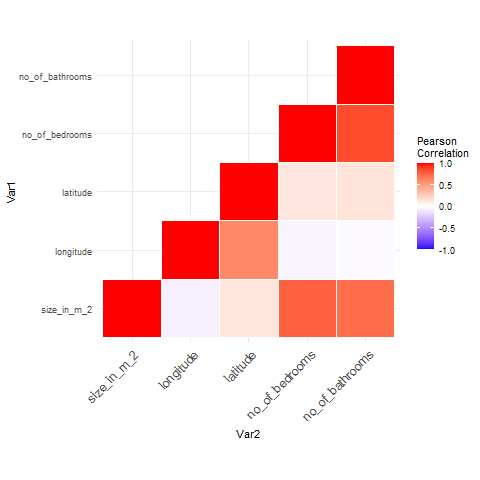

In [98]:
%%R

upper_tri <- get_upper_tri(R)

# Melt the correlation matrix
library(reshape2)

melted_cormat <- melt(upper_tri, na.rm = TRUE)

# Heatmap
library(ggplot2)

ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

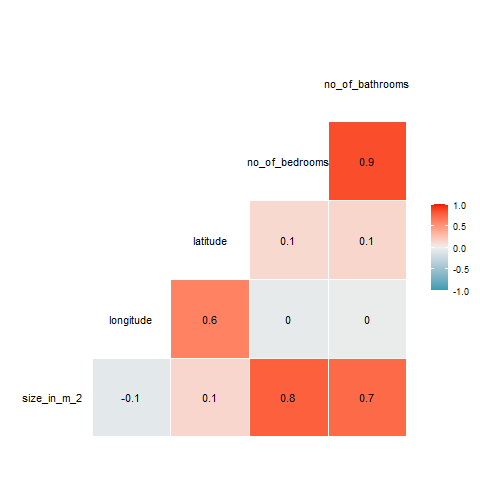

In [105]:
%%R
library(GGally)

ggcorr(data_R %>% select(-price, -quality), label=TRUE)

##### Identification of multicollinearity with $R$ in Python

,size_in_m_2,longitude,latitude,no_of_bedrooms,no_of_bathrooms,quality
0,100.242337,55.138932,25.113208,1,2,1
1,146.972546,55.151201,25.106809,2,2,1
2,181.253753,55.137728,25.063302,3,5,1
3,187.664060,55.341761,25.227295,2,3,0
4,47.101821,55.139764,25.114275,0,1,1
...,...,...,...,...,...,...
1900,100.985561,55.310712,25.176892,2,2,3
1901,70.606280,55.276684,25.166145,1,2,1
1902,179.302790,55.345056,25.206500,3,5,1
1903,68.748220,55.229844,25.073858,1,2,1


In [100]:
(data_Python >> select( ~ X.price )).corr()

,size_in_m_2,longitude,latitude,no_of_bedrooms,no_of_bathrooms
size_in_m_2,1.000000,-0.066657,0.137518,0.775113,0.725397
longitude,-0.066657,1.000000,0.605875,-0.045668,-0.025000
latitude,0.137518,0.605875,1.000000,0.124162,0.141160
no_of_bedrooms,0.775113,-0.045668,0.124162,1.000000,0.854384
no_of_bathrooms,0.725397,-0.025000,0.141160,0.854384,1.000000


##### Identification of multicollinearity with $R^{-1}$

It´s define the variance increase factor (VIF) of X_i as:

$$VIF(i) = Diag(R^{-1})[\hspace{0.1cm} i\hspace{0.1cm}] = \text{i element of} \hspace{0.1cm} Diag(R^{-1})$$

And it´s fullfield that:

$$ VIF(i) = \dfrac{1}{1- R^2_{X_i}} $$

Where:

$R^2_{X_i}$ is the R^2 of the linear regression model $X_i = \beta_0 + \beta_1 \cdot  X_1 +...+ \beta_{i-1}\cdot X_{i-1} + \beta_{i+1}\cdot X_{i+1} + ... + \beta_p \cdot X_p$

So, $R^2_{X_i}$  is the proporcion of variability of $X_i$ explained by $X_1,..,X_{i-1},X_{i+1},..,X_p$




**Criterion:**

If $\hspace{0.15cm}VIF(i) > 10$ $\hspace{0.15cm}\left( R^2_{X_i} > 0.90 \right)$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ **High** multicollinearity

If $\hspace{0.15cm}VIF(i)  \in [4, 10]$  $\hspace{0.15cm}\left(R^2_{X_i} \in [0.75 , 0.90]\right)$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ Medium multicollinearity


If  $\hspace{0.15cm}VIF(i) < 4$ $\hspace{0.15cm}\left(R^2_{X_i} < 0.75 \right)$ $\hspace{0.1cm}\Rightarrow\hspace{0.1cm}$ Low multicollinearity


##### Identification of multicollinearity with eigenvalues of $R$

The condition number of R is defined as:

$$cond(R) = \sqrt{\dfrac{max\lbrace eigenvalues(R)\rbrace}{min\lbrace eigenvalues(R)\rbrace}} $$

**Criterion :**

If $\hspace{0.1cm} cond(R) > 30$ $\hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ **High** multicollinearity

If $\hspace{0.1cm}cond(R) \in (10 , 30)$ $\hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ Medium multicollinearity

If $\hspace{0.1cm}cond(R) < 10$ $\hspace{0.1cm} \Rightarrow\hspace{0.1cm}$ Medium multicollinearity


### incumplimiento de supuestos





### Que hacer ? Alternativas / soluciones